# Homework 5


In [16]:
from dotenv import load_dotenv
import os
load_dotenv()
dataset_path = os.getenv('HOMEWORK_DATASET')

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [18]:
dtypes = {
    "Paziente": pd.Int32Dtype(),
    "Sesso": pd.CategoricalDtype(['F','M']),
    "Età equivalente": pd.Int8Dtype(),
    "B1": pd.Int8Dtype(),
    "B6": pd.Int8Dtype(),
    "B10": pd.Int8Dtype(),
    "B11": pd.Int8Dtype(),
    "B13": pd.Int8Dtype(),
    "B14": pd.Int8Dtype(),
    "B16": pd.Int8Dtype(),
    "B2": pd.Int8Dtype(),
    "B3": pd.Int8Dtype(),
    "B9": pd.Int8Dtype(),
    "B10": pd.Int8Dtype(),
    "B13": pd.Int8Dtype(),
    "B14": pd.Int8Dtype(),
    "D3": pd.Int8Dtype(),
    "D4": pd.Int8Dtype(),
    "D13": pd.Int8Dtype(),
    "D14": pd.Int8Dtype(),
    "D15": pd.Int8Dtype(),
    "D16": pd.Int8Dtype(),
    "D18": pd.Int8Dtype(),
    "D2": pd.Int8Dtype(),
    "D3": pd.Int8Dtype(),
    "D4": pd.Int8Dtype(),
    "D7": pd.Int8Dtype(),
    "D8": pd.Int8Dtype(),
    "D9": pd.Int8Dtype(),
    "D10": pd.Int8Dtype(),
    "D13": pd.Int8Dtype(),
    "D14": pd.Int8Dtype(),
    "D15": pd.Int8Dtype(),
    "D1": pd.Int8Dtype(),
    "D2": pd.Int8Dtype(),
    "D4": pd.Int8Dtype(),
    "D5": pd.Int8Dtype(),
    "D7": pd.Int8Dtype(),
    "D8": pd.Int8Dtype(),

}

class_names = ['ASD','GDD', 'Controlli']
sheets = pd.read_excel(
    dataset_path,
    sheet_name=class_names,
    header=1,
    index_col=0,
    dtype=dtypes
)

In [19]:

for [class_name, df] in sheets.items():
    df['class_name'] = class_name

df = pd.concat([
    ds for ds in sheets.values()
])

df = df.drop(columns=['Età cronologica (mesi)', "Scala B", "Scala D", "TOT.", "Score di rischio"])
df['Sesso'] = df['Sesso'].map( lambda x: 0 if x == 'M' else 1)

df = df[df['Età equivalente'] >=12]
df

,Sesso,Età equivalente,B1,B6,B10,B11,B13,B14,B16,B2,B3,B9,B10.1,B13.1,B14.1,D3,D4,D13,D14,D15,D16,D18,D2,D3.1,D4.1,D7,D8,D9,D10,D13.1,D14.1,D15.1,D1,D2.1,D4.2,D5,D7.1,D8.1,class_name
Pazienti,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,24,0,0,0,0,0,0,0,0,0,1,2,2,1,0,0,1,2,0,0,2,0,2,0,0,2,0,0,0,1,0,1,2,1,1,2,1,ASD
2,1,27,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,ASD
3,0,20,0,0,0,0,2,0,0,0,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,1,0,1,2,1,1,2,1,ASD
4,1,29,2,0,0,1,2,1,1,1,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1,2,1,1,0,0,ASD
5,0,26,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1,2,1,1,2,1,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,Controlli
55,1,18,0,0,0,0,0,0,0,0,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Controlli
56,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,Controlli


# Task 1
Task one requires to plot patients with a 2D scatter plot.

In [20]:
plot_df = df.drop(columns=["class_name"])


plot_df = pd.DataFrame(
    data=PCA(n_components=2).fit_transform(StandardScaler().fit_transform(plot_df)),
    columns=['x','y'],
    index=df.index,
)

plot_df['class_name'] = df['class_name']

plot_df

,x,y,class_name
Pazienti,,,
1,-0.409012,5.074032,ASD
2,-2.177355,-0.281238,ASD
3,-1.300229,4.599480,ASD
4,2.373147,1.936113,ASD
5,-2.143736,3.896934,ASD
...,...,...,...
54,-1.596151,-1.222811,Controlli
55,-1.844843,-1.047786,Controlli
56,-2.374911,1.695117,Controlli


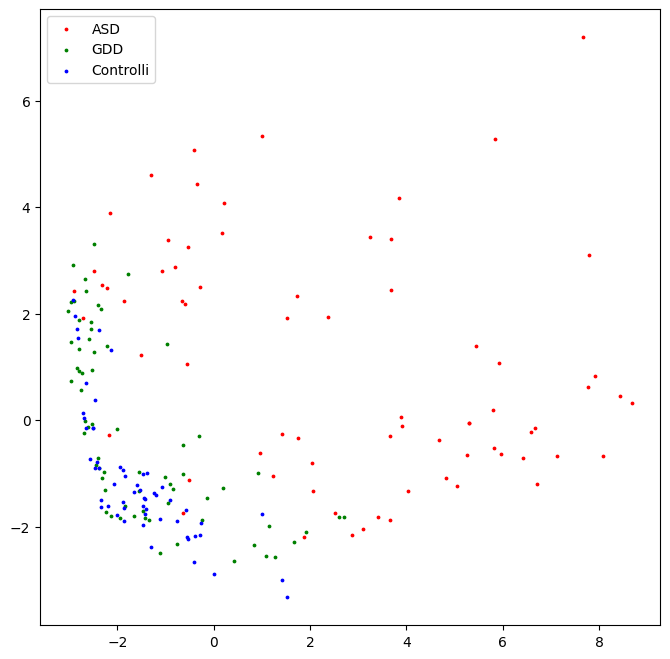

In [ ]:
import matplotlib.pyplot as plt

class_colors = {'ASD':'red','GDD': 'green', 'Controlli': 'blue'}

fig, ax = plt.subplots(1, figsize=(8,8))

for class_name, color in class_colors.items():
    class_df = plot_df[plot_df["class_name"] == class_name]
    ax.scatter(class_df['x'], class_df['y'], s=3, color=color, label=class_name)
ax.legend()
plt.show()


# Task 2: Split the dataset into train and test set

In [ ]:
def extract_sample(df: pd.DataFrame, class_name: str, size: float):
    sdf = df[df['class_name'] == class_name ]
    n = int(float(sdf.shape[0]) * size)
    return sdf.sample(n)

train_df = pd.concat([
    extract_sample(df, class_name, 0.6) for class_name in class_names
])
test_df = df.drop(index=train_df.index)




,Sesso,Età equivalente,B1,B6,B10,B11,B13,B14,B16,B2,B3,B9,B10.1,B13.1,B14.1,D3,D4,D13,D14,D15,D16,D18,D2,D3.1,D4.1,D7,D8,D9,D10,D13.1,D14.1,D15.1,D1,D2.1,D4.2,D5,D7.1,D8.1,class_name
Pazienti,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21,0,25,2,2,0,0,0,0,1,0,1,0,0,0,0,1,0,1,2,0,0,2,2,2,0,0,2,0,0,0,1,0,1,2,1,1,0,0,ASD
46,0,28,2,2,0,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,1,1,0,1,2,1,1,0,0,ASD
55,0,18,0,2,0,0,2,0,1,1,1,0,0,0,0,0,2,1,0,1,1,0,2,0,1,1,2,1,0,1,1,0,0,0,0,0,0,0,ASD
64,0,12,0,0,1,1,2,0,1,0,0,0,0,0,0,1,0,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ASD
71,1,22,0,0,0,0,0,0,0,1,1,0,0,0,0,1,2,1,2,1,0,0,2,0,1,0,2,1,0,1,1,1,0,0,0,0,0,0,ASD
21,1,28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,GDD
46,1,27,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,2,1,1,0,0,GDD
55,0,28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,GDD
64,1,21,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,1,1,0,0,0,0,0,0,0,GDD
